# Jupyter notebook Linear Regression Assignment 1

In [90]:
# Import libraries
import pandas as pd
import requests
import certifi
from io import StringIO

In [91]:
file_url = 'https://drive.google.com/uc?export=download&id=1e6E-F_NpGiq5jsApDGhXz2JPb8mIWiWU'

In [93]:
response = requests.get(file_url, verify=certifi.where())
response.raise_for_status()
csv_data = StringIO(response.text)
melbourne_full_df = pd.read_csv(csv_data)

In [94]:
print("Melbourne Housing Full Dataset:")
print(melbourne_full_df.head())

Melbourne Housing Full Dataset:
       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lat

In [95]:
non_numeric_columns = melbourne_full_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [42]:
melbourne_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [43]:
columnas = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for col in columnas:
    melbourne_full_df[col] = melbourne_full_df[col].astype('string')

melbourne_full_df['Date']=pd.to_datetime(melbourne_full_df['Date'], format="%d/%m/%Y")
melbourne_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  string        
 1   Address        34857 non-null  string        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  string        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  string        
 6   SellerG        34857 non-null  string        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [44]:
melbourne_full_df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34857,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,2017-05-23 11:01:38.838109696,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,2016-11-19 00:00:00,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,2017-07-08 00:00:00,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,2017-10-28 00:00:00,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,2018-03-17 00:00:00,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000
std,0.969933,6.414671e+05,NaN,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313


In [45]:
print("\nMissing values in Melbourne Housing Full Dataset:")
print(melbourne_full_df.isnull().sum())


Missing values in Melbourne Housing Full Dataset:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [46]:
target_variable = 'Price'
all_columns = melbourne_full_df.columns.tolist()
feature_attributes = [col for col in all_columns if col != target_variable]
print("Target Variable:", target_variable)
print("Feature Attributes:", feature_attributes)

Target Variable: Price
Feature Attributes: ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df):
    numeric_features = df.select_dtypes(include=[np.number])
    for column in numeric_features.columns:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.show()

Data Distribution in Full Dataset:


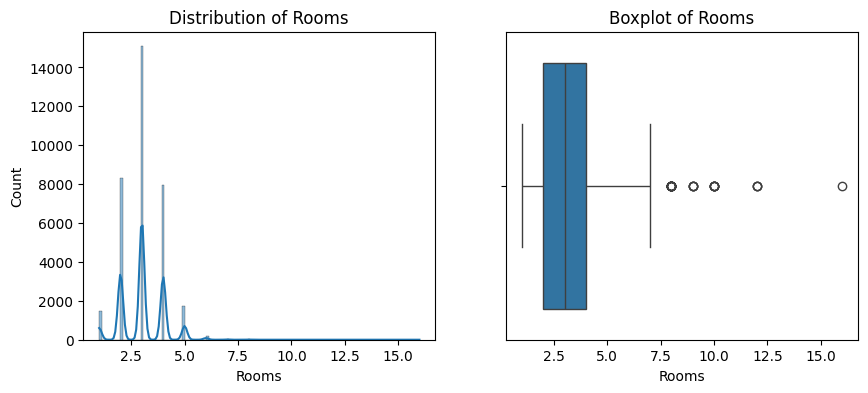

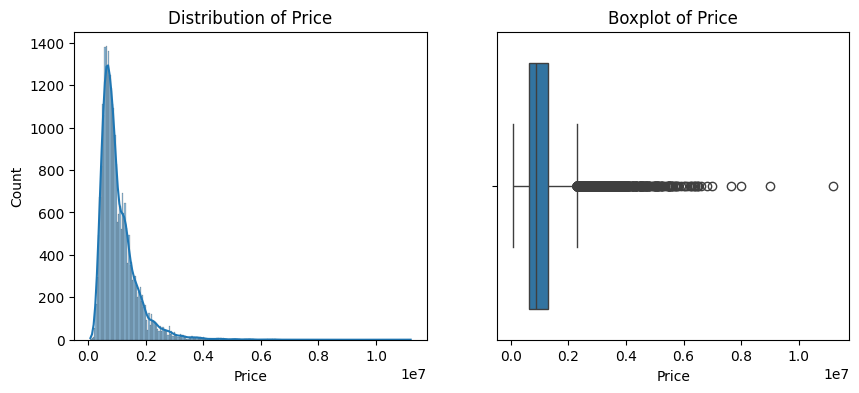

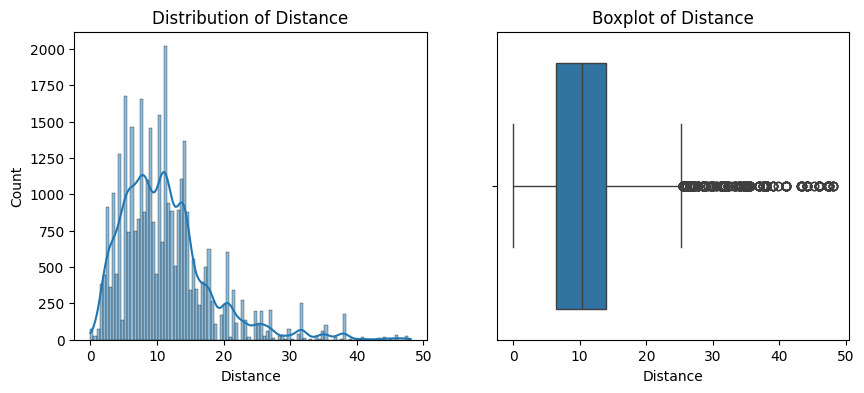

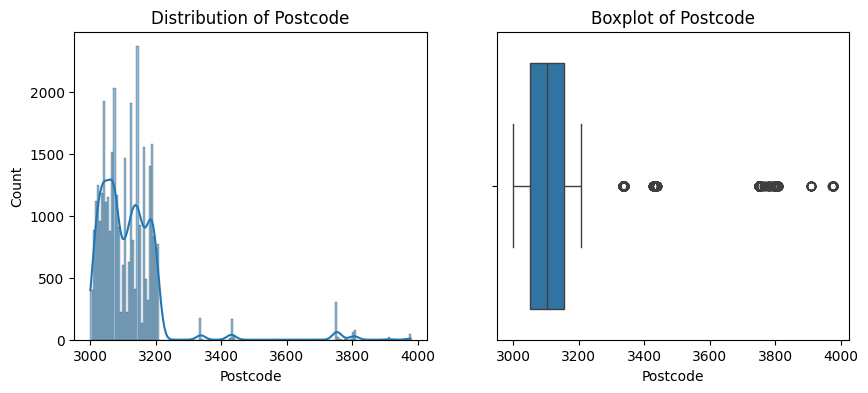

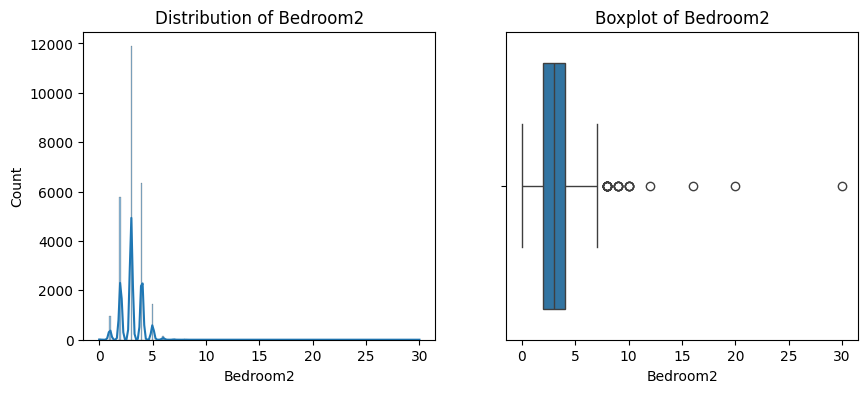

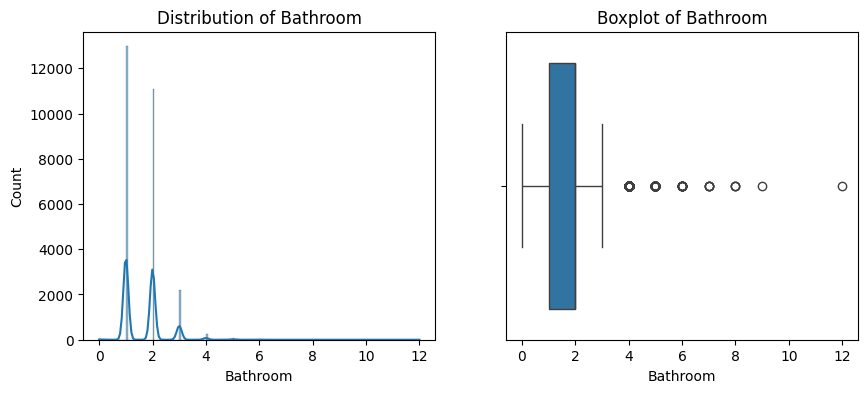

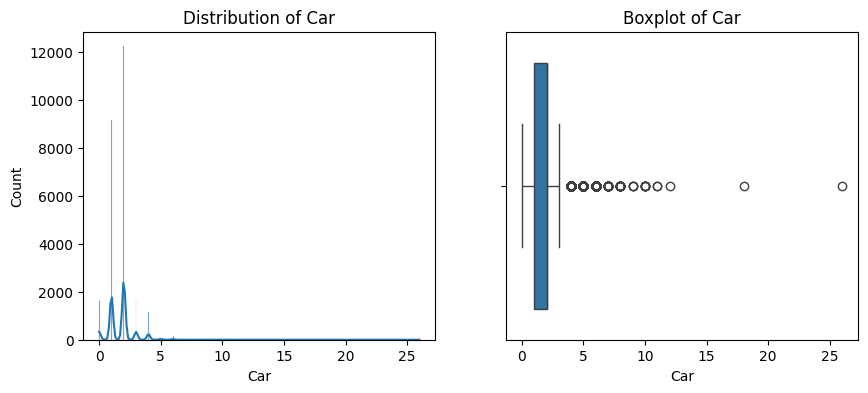

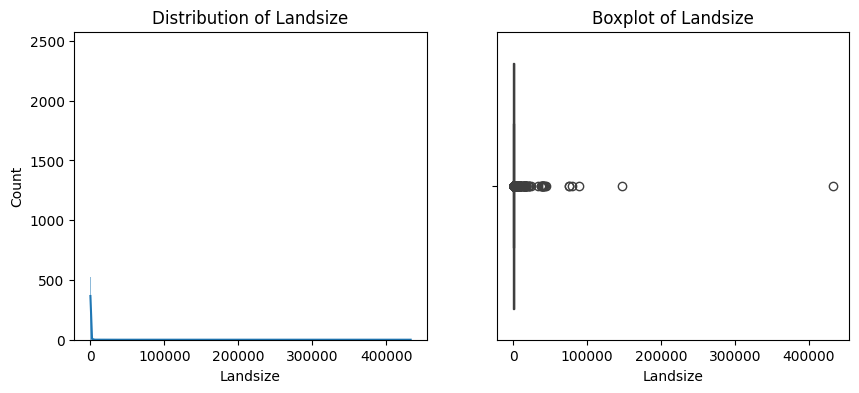

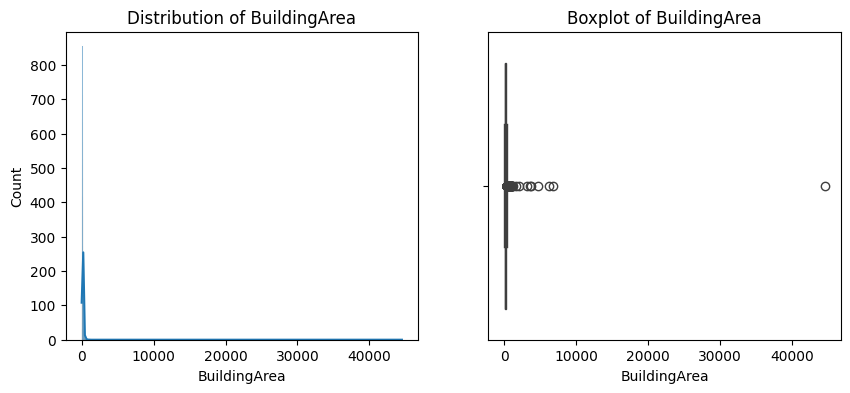

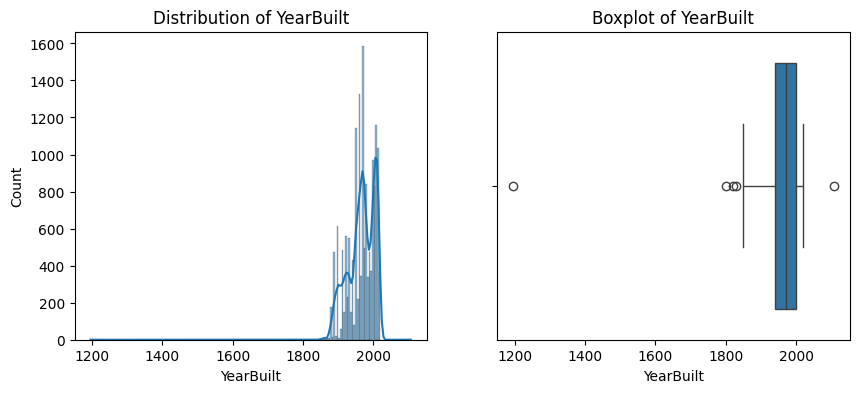

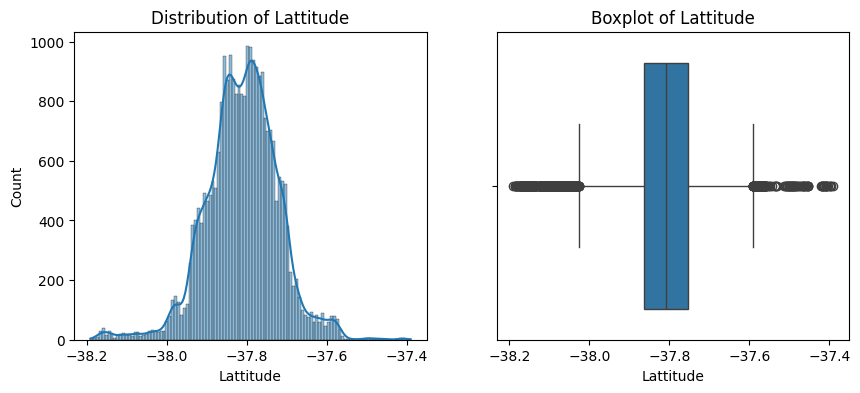

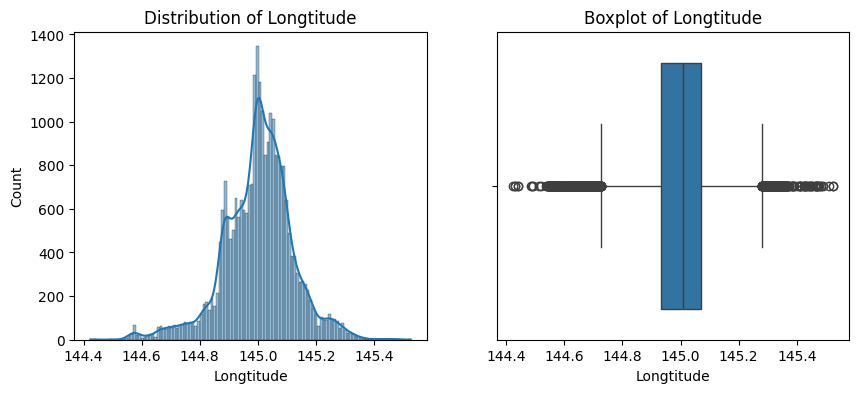

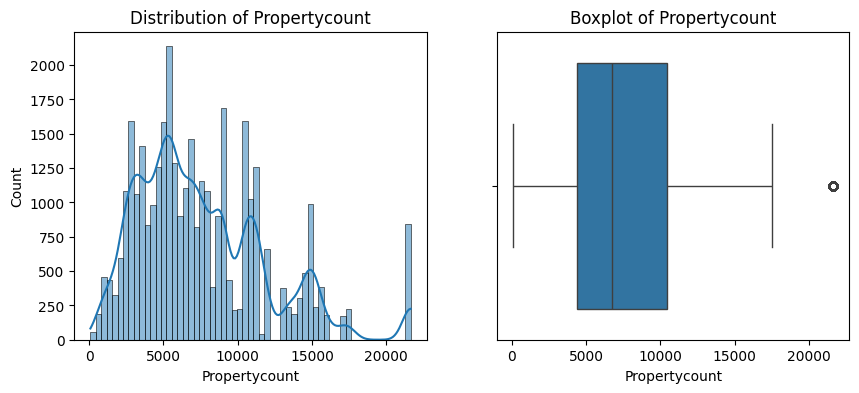

In [48]:
print("Data Distribution in Full Dataset:")
plot_distribution(melbourne_full_df)

In [50]:
melbourne_full_df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [51]:
melbourne_full_df.drop_duplicates(inplace=True)
mel_sin_string=melbourne_full_df.copy()
mel_sin_string=mel_sin_string.drop(['Suburb','Address','SellerG'],axis=1)

In [52]:
mel_sin_string[['Method']].value_counts()

Method
S         19744
SP         5094
PI         4850
VB         3108
SN         1317
PN          308
SA          226
W           173
SS           36
Name: count, dtype: int64

In [53]:
mel_sin_string[['Type']].value_counts()

Type
h       23980
u        7297
t        3579
Name: count, dtype: int64

In [54]:
mel_sin_string['CouncilArea'].value_counts()

CouncilArea
Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1045
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

In [55]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(mel_sin_string[['Method']])
mel_sin_string['Method_Int'] = housing_cat_encoded
mel_sin_string[['Method_Int']].value_counts()

Method_Int
2.0           19744
5.0            5094
0.0            4850
7.0            3108
4.0            1317
1.0             308
3.0             226
8.0             173
6.0              36
Name: count, dtype: int64

In [56]:
oe= OrdinalEncoder()
mel_sin_string['CouncilArea'].replace(['NAType', 'str'], None)
mel_sin_string['CouncilArea'] = mel_sin_string['CouncilArea'].astype(str)
housing_cat_encoded = oe.fit_transform(mel_sin_string[['CouncilArea']])
mel_sin_string['CouncilArea_Int'] = housing_cat_encoded
mel_sin_string[['CouncilArea_Int']].value_counts()

CouncilArea_Int
3.0                3675
7.0                2851
25.0               2122
9.0                2006
19.0               1952
1.0                1861
23.0               1791
2.0                1764
4.0                1593
22.0               1466
28.0               1460
17.0               1451
27.0               1280
12.0               1214
32.0               1186
16.0               1045
11.0                942
13.0                871
30.0                828
31.0                624
29.0                618
18.0                506
14.0                371
10.0                314
20.0                292
8.0                 290
6.0                 176
33.0                102
26.0                 88
15.0                 46
5.0                  41
21.0                 20
24.0                  7
0.0                   3
Name: count, dtype: int64

In [57]:
oe= OrdinalEncoder()
mel_sin_string['Regionname'].replace(['NAType', 'str'], None)
mel_sin_string['Regionname'] = mel_sin_string['Regionname'].astype(str)
housing_cat_encoded = oe.fit_transform(mel_sin_string[['Regionname']])
mel_sin_string['Regionname_Int'] = housing_cat_encoded
mel_sin_string[['Regionname_Int']].value_counts()

Regionname_Int
6.0               11836
3.0                9557
7.0                6799
1.0                4376
5.0                1739
2.0                 228
4.0                 203
8.0                 115
0.0                   3
Name: count, dtype: int64

In [58]:
mel_sin_string=mel_sin_string[mel_sin_string['Type']=='h']
dfmelboune=mel_sin_string.drop(['Type','Method','CouncilArea','Regionname'],axis=1)
dfmelboune

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Method_Int,CouncilArea_Int,Regionname_Int
0,2,NaN,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0,6.0,32.0,3.0
1,2,1480000.0,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0,2.0,32.0,3.0
2,2,1035000.0,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,2.0,32.0,3.0
4,3,1465000.0,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,5.0,32.0,3.0
5,3,850000.0,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0,0.0,32.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,1101000.0,2018-02-24,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,-37.81095,144.88516,6543.0,2.0,17.0,7.0
34852,4,1480000.0,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0,0.0,17.0,7.0
34853,2,888000.0,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0,5.0,17.0,7.0
34855,3,1140000.0,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,5.0,17.0,7.0


In [59]:
corr_matrix= dfmelboune.corr()
corr_matrix

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Method_Int,CouncilArea_Int,Regionname_Int
Rooms,1.000000,0.318045,0.072691,0.153622,0.087980,0.922920,0.608162,0.302227,0.034242,0.128913,0.187893,-0.038916,0.114497,-0.016720,0.010991,-0.091053,-0.008853
Price,0.318045,1.000000,-0.079137,-0.381498,0.012566,0.298083,0.383945,0.099694,0.025981,0.075080,-0.293182,-0.265892,0.214247,-0.039029,0.024109,-0.100556,0.112618
Date,0.072691,-0.079137,1.000000,0.294207,0.133470,0.125187,0.063975,0.122260,0.023495,0.008947,0.206005,0.012316,0.051383,0.039238,0.036485,0.073476,-0.104387
Distance,0.153622,-0.381498,0.294207,1.000000,0.514903,0.170186,0.082597,0.193485,0.068879,0.058115,0.480643,-0.099426,0.178340,0.040408,-0.018816,-0.047082,-0.142311
Postcode,0.087980,0.012566,0.133470,0.514903,1.000000,0.094036,0.127039,0.059431,0.043416,0.038030,0.141168,-0.187658,0.344997,0.022386,0.000729,0.035784,-0.073262
Bedroom2,0.922920,0.298083,0.125187,0.170186,0.094036,1.000000,0.609537,0.296184,0.033627,0.126028,0.192316,-0.038036,0.116559,-0.011998,0.009498,-0.084978,-0.017551
Bathroom,0.608162,0.383945,0.063975,0.082597,0.127039,0.609537,1.000000,0.253745,0.032408,0.126933,0.246768,-0.071983,0.113262,-0.012341,0.016608,-0.058349,0.023204
Car,0.302227,0.099694,0.122260,0.193485,0.059431,0.296184,0.253745,1.000000,0.032769,0.083840,0.232787,-0.020660,0.038273,0.016498,0.000772,-0.111453,0.031774
Landsize,0.034242,0.025981,0.023495,0.068879,0.043416,0.033627,0.032408,0.032769,1.000000,0.447785,0.082807,0.025445,-0.000713,-0.021777,0.010204,-0.001196,-0.015724
BuildingArea,0.128913,0.075080,0.008947,0.058115,0.038030,0.126028,0.126933,0.083840,0.447785,1.000000,0.192845,0.016726,-0.005809,-0.016698,-0.000949,-0.024003,0.002805


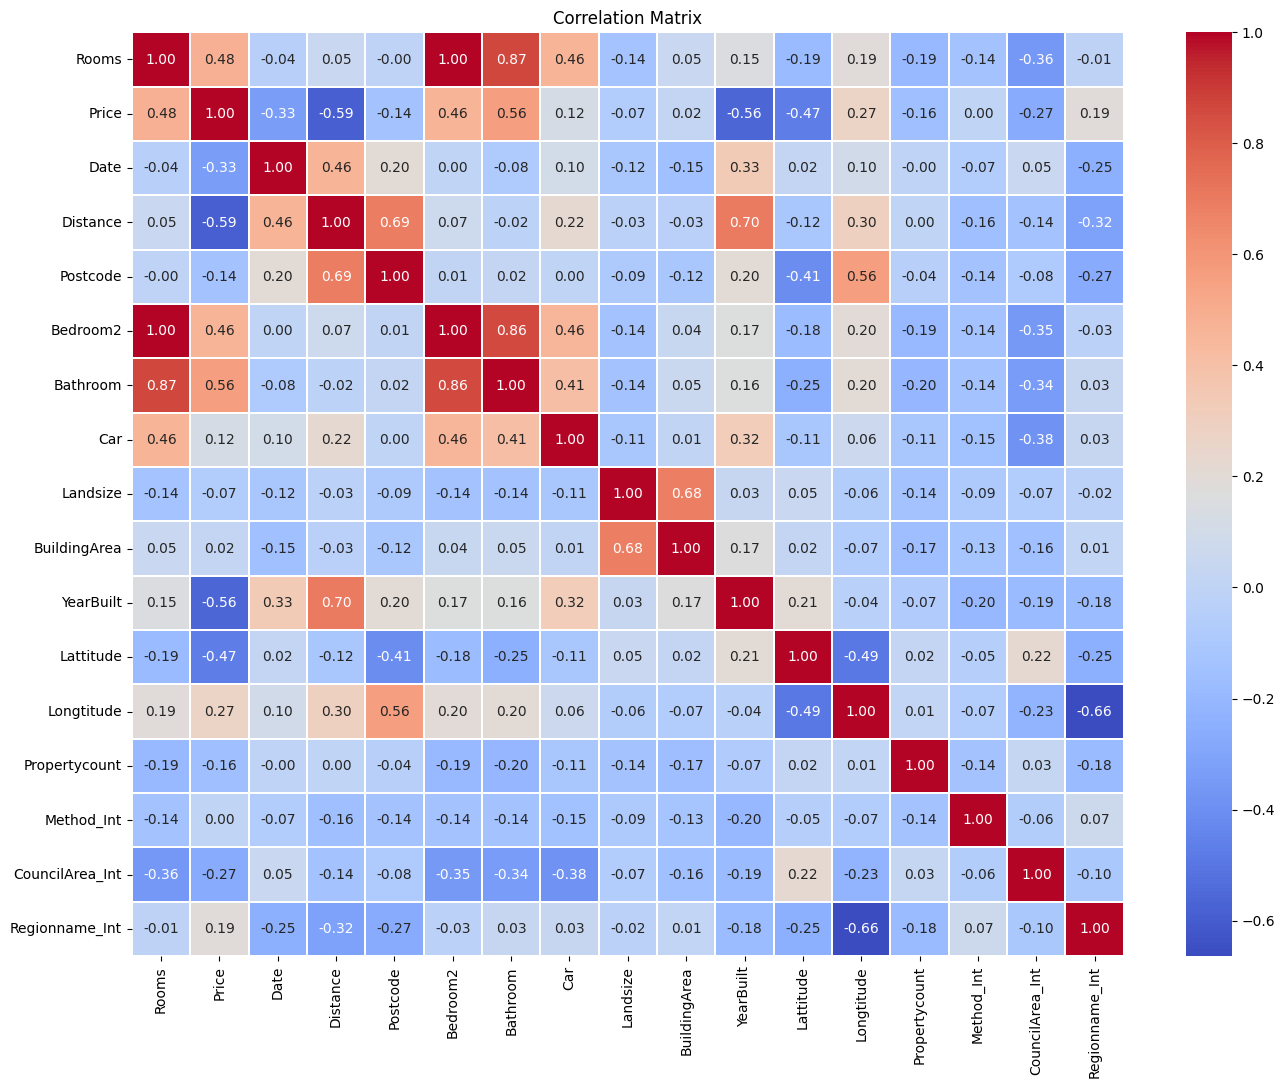

In [62]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 12))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_heatmap(corr_matrix)

In [63]:
def plot_pairplot(df, features):
    sns.pairplot(df[features])
    plt.show()

Pairplot for Selected Features in Full Dataset:


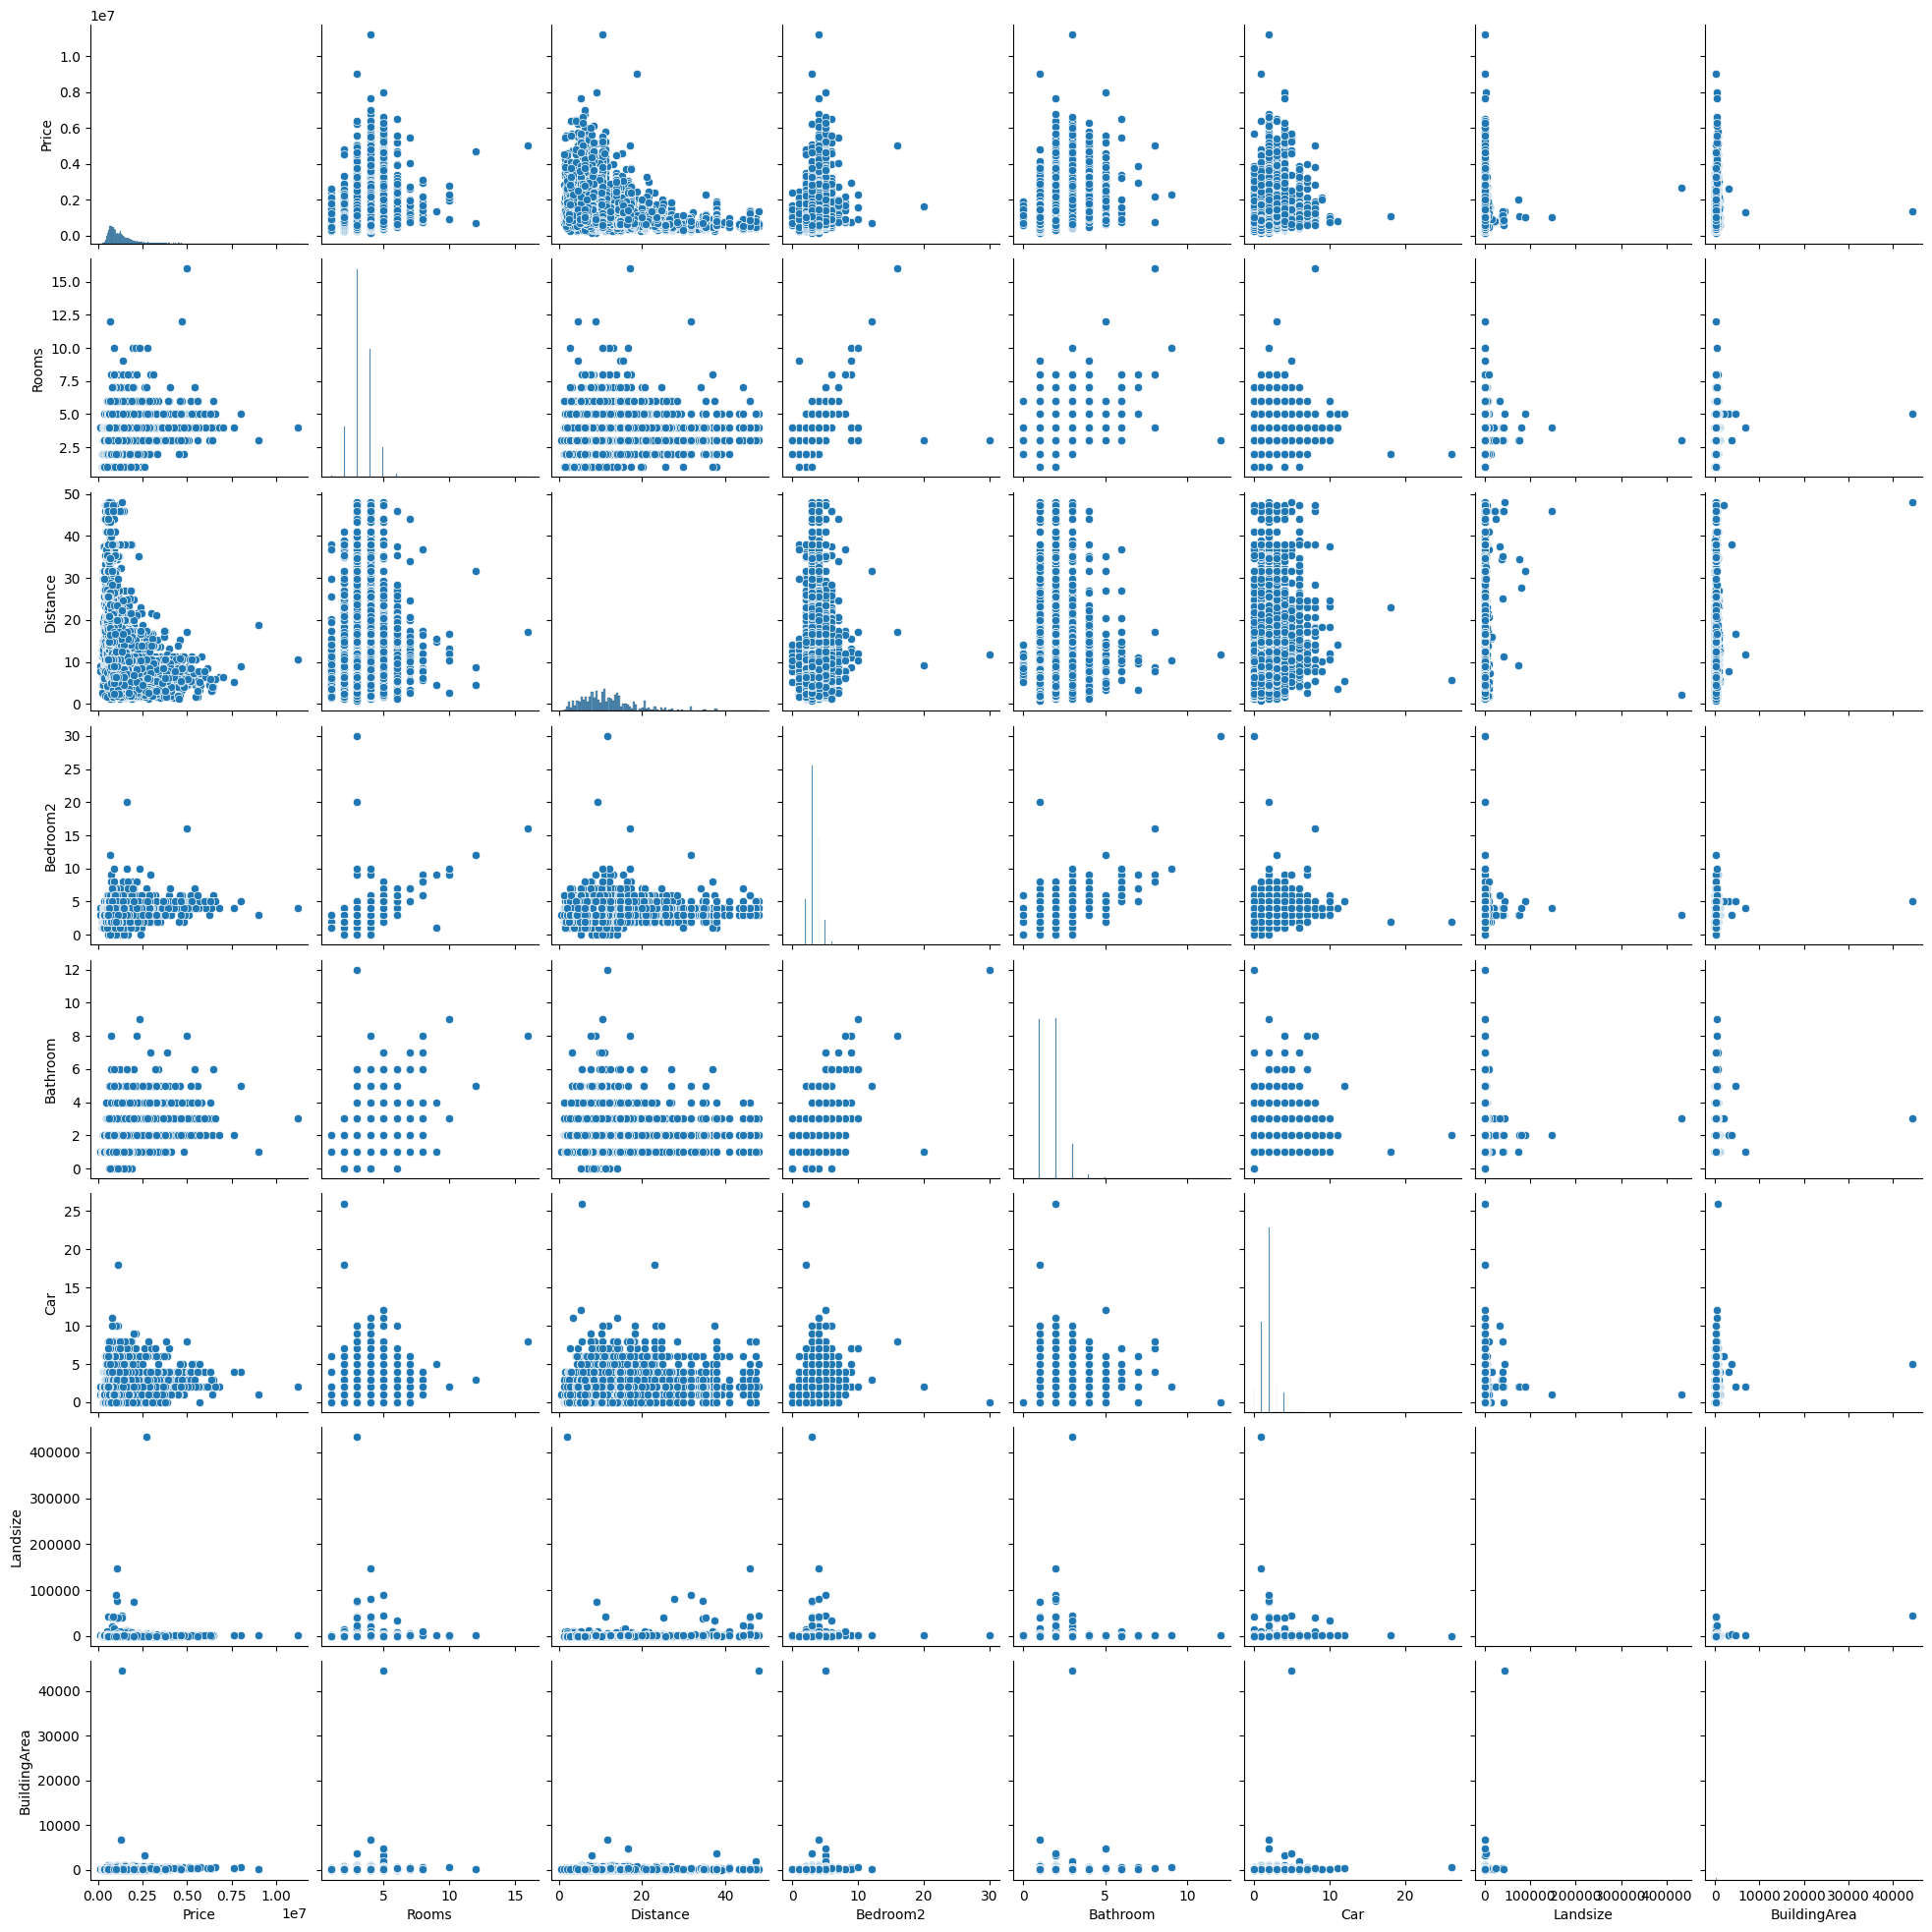

In [65]:
selected_features = ['Rooms', 'Bathroom', 'BuildingArea', 'Landsize', 'YearBuilt']

print("Pairplot for Selected Features in Full Dataset:")
plot_pairplot(dfmelboune, selected_features)

In [66]:
print("Correlation with Price (Full Dataset):")
print(corr_matrix['Price'].sort_values(ascending=False))

Correlation with Price (Full Dataset):
Price              1.000000
Bathroom           0.383945
Rooms              0.318045
Bedroom2           0.298083
Longtitude         0.214247
Regionname_Int     0.112618
Car                0.099694
BuildingArea       0.075080
Landsize           0.025981
Method_Int         0.024109
Postcode           0.012566
Propertycount     -0.039029
Date              -0.079137
CouncilArea_Int   -0.100556
Lattitude         -0.265892
YearBuilt         -0.293182
Distance          -0.381498
Name: Price, dtype: float64


In [67]:

selected_features_full = corr_matrix['Price'].sort_values(ascending=False).index[1:5].tolist()

In [68]:
print("Selected Features for Detailed Analysis:", selected_features_full)

Selected Features for Detailed Analysis: ['Bathroom', 'Rooms']


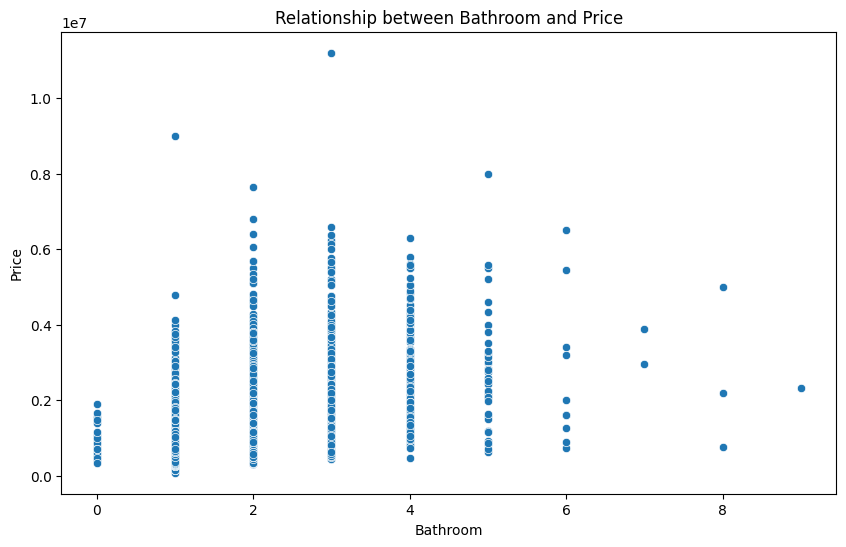

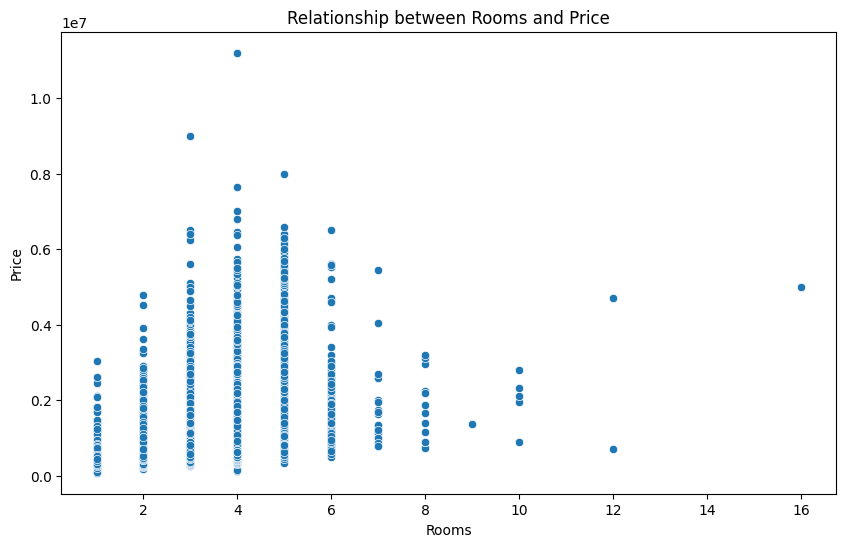

In [69]:
def plot_feature_relationships(df, features, target):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=feature, y=target)
        plt.title(f'Relationship between {feature} and {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()

plot_feature_relationships(melbourne_full_df, selected_features_full, 'Price')

In [70]:
from sklearn.model_selection import train_test_split

In [106]:
selected_features_full = ['Rooms', 'Bathroom', 'BuildingArea', 'Landsize', 'YearBuilt']
melbourne_full_df = melbourne_full_df.dropna(subset=selected_features_full + ['Price'])
# Log transform skewed variables
melbourne_full_df['Landsize'] = np.log1p(melbourne_full_df['Landsize'])
melbourne_full_df['Price'] = np.log1p(melbourne_full_df['Price'])

X = melbourne_full_df[selected_features_full]
y = melbourne_full_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training feature matrix shape: {X_train.shape}')
print(f'Test feature matrix shape: {X_test.shape}')
print(f'Training target vector shape: {y_train.shape}')
print(f'Test target vector shape: {y_test.shape}')

Training feature matrix shape: (6319, 5)
Test feature matrix shape: (2709, 5)
Training target vector shape: (6319,)
Test target vector shape: (2709,)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_train_pred = ols_model.predict(X_train)
y_test_pred = ols_model.predict(X_test)

In [125]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [126]:
print("OLS Linear Regression Model")
print("---------------------------")
print(f"Coefficients: {ols_model.coef_}")
print(f"Intercept: {ols_model.intercept_}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

OLS Linear Regression Model
---------------------------
Coefficients: [ 0.09529983  0.21753786  0.00144077  0.02264099 -0.00602534]
Intercept: 24.604337957350765
Training MSE: 0.1332203425637371
Test MSE: 0.136132539043511
Training R-squared: 0.5358681411057857
Test R-squared: 0.5122711054758928


In [128]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [131]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, tol=1e-3, random_state=42))
])
param_grid = {
    'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'sgd__eta0': [0.0001, 0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_sgd_model = grid_search.best_estimator_

y_train_pred_sgd = best_sgd_model.predict(X_train)
y_test_pred_sgd = best_sgd_model.predict(X_test)

train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

In [132]:
print("SGD Linear Regression Model")
print("---------------------------")
print(f"Coefficients: {sgd_model.coef_}")
print(f"Intercept: {sgd_model.intercept_}")
print(f"Training MSE: {train_mse_sgd}")
print(f"Test MSE: {test_mse_sgd}")
print(f"Training R-squared: {train_r2_sgd}")
print(f"Test R-squared: {test_r2_sgd}")

SGD Linear Regression Model
---------------------------
Coefficients: [237704.56990172 210247.94853327]
Intercept: [104036.35573886]
Training MSE: 0.1333013091731647
Test MSE: 0.13640784339648032
Training R-squared: 0.535586058187976
Test R-squared: 0.5112847587238609
